Machine Learning Model for predicting Snygas Production
<br> This NoteBook is Created for Preliminary Data Analysis
<br> Requires the .csv file stated in this Notebook for implementation

This Notebook will primary introduce some functions used for plotting (matplotlib, seaborn)
<br> Also on data manipulation (pandas, numpy) and data visualization (seaborn)

Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import time as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

To plot trend of literature on "Nickel-Based Catalyst for DRM" over the past 20 years
<br> Requires the trend.csv file to be in the same folder as this NoteBook

The total no. of papers is 1810


<Figure size 1152x1152 with 0 Axes>

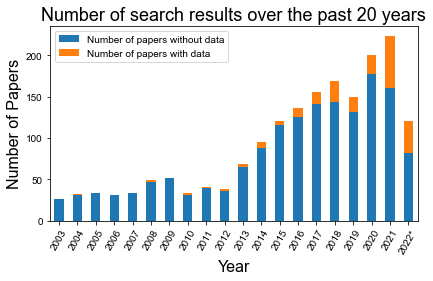

In [2]:
def plttrend(csv_filename: str) -> None:
    # Use pandas.read_csv(file, header = 0, index_col = False) to read .csv file 
    # The values in the .csv file is now converted to a pandas DataFrame object
    dftrend = pd.read_csv(csv_filename, header = 0, index_col = False, encoding = 'cp1252')
    # Make 3 pandas series object
    paperswithdata = dftrend.iloc[:,-1] # papers with data (last column)
    paperswithoutdata =dftrend.iloc[:,-2] # papers without data (2nd last column)
    idx = dftrend.iloc[:,-3] # Number of years (3rd last column)

    print("The total no. of papers is {:.0f}".format(sum(paperswithdata)+sum(paperswithoutdata)))
    # Concatenate the paperwithoutdata and paperwithdata Series into a pandas DataFrame
    df = pd.DataFrame({'Number of papers without data': paperswithoutdata, 'Number of papers with data': paperswithdata})

    # Use Matplotlib to plot a bar plot of research interest in DRM over the past 20 years 
    ax = plt.figure(figsize=(16,16)) # Initalize figure object
    ax = df.plot.bar(stacked=True)   # plot bar plot from DataFrame
    ax.set_xticks(np.arange(len(idx))) # set x ticks
    ax.set_xticklabels(idx)            # set x tick labels as the years
    plt.ylabel('Number of Papers', fontsize=16) # Write y label
    plt.xlabel('Year', fontsize=16)             # Write x label
    plt.title("Number of search results over the past 20 years", fontsize=18)
    plt.tight_layout()
    plt.xticks(rotation=60)
    plt.show()

plttrend("trend.csv")

Some Auxiliary functions used for filtering

In [3]:
def fil(df: pd.DataFrame, thres: float, var: int):
    '''Takes in DataFrame df, threshold thres and variables var
    Filter the df[var] series by the bottom thres percentile and top (1-thres) percentile
    Essentially, we are filtering out the distribution of values to take values between (thres, 1-thres)'''
    df = df.loc[df[var] >= df[var].quantile(thres)]
    df = df.loc[df[var] <= df[var].quantile(1-thres)]
    return df

def filterX(df, thres=0.005):    
    '''To filter out data in the top 0.5 percentile in the DataFrame (thres = 0.0005 since quantile is range from [0 1])
    Returns a copy of the filtered DataFrame'''
    df3 = df # Copy Dataframe
    # Create a list of variables that we want to filter
    lst = ["Surface Area","Pore Volume", "GHSV",  "Ni Loading", "Ni Particle Size", "H2-TPR Peak Temperature","Pore Size"]
    for i in lst:
        # Use auxiliary function fil above to filter
        df3 = fil(df3, thres, i)
    
    df3.reset_index() # reset index in to re-ogansize DataFrame after some values are dropped
    print("Before, there are {} data points in X".format(len(df.index)))
    print("After filtering, there are {} data points in filtered X".format(len(df3.index)))
    return df3 

def filtery(df):
    '''Similar to filterX code but here we use np.percentile() function,
    which is faster than pandas.quantile but we cannot take df[var] 
    if var is a string with a space between'''
    thres = 0.5 # 0.995 percentile
    df3 = df
    upper_thres = np.percentile(df3.Syngas_Ratio,thres)
    lower_thres = np.percentile(df3.Syngas_Ratio,100-thres)
    df3 = df3[upper_thres < df3.Syngas_Ratio]
    df3 = df3[df3.Syngas_Ratio < lower_thres]
    df3 = df3.reset_index()
    print("Before, there are {} data points in y".format(len(df.index)))
    print("After filtering, there are {} data points in filtered y".format(len(df3.index)))
    return df3

def checkna(df):
    return df.isnull().any()

To read the Final Complied.csv file and plot distributions of the target variables

                Catalyst  Ratio of CH4 in Feed  Reaction Temperature  \
0            Ni−SiO2‑550                  0.15                 650.0   
1            Ni−SiO2‑750                  0.15                 650.0   
2      Ni/Sn0.2−SiO2‑550                  0.15                 650.0   
3      Ni/Sn0.2−SiO2‑750                  0.15                 650.0   
4     Ni/Sn0.05−SiO2‑550                  0.15                 650.0   
...                  ...                   ...                   ...   
1709              Ni-IMP                  0.50                 750.0   
1710            Ni/CZ100                  0.50                 700.0   
1711             Ni/CZ75                  0.50                 700.0   
1712             Ni/CZ44                  0.50                 700.0   
1713             Ni/CZ28                  0.50                 700.0   

      Ni Loading  Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          10.00            0.5        4.7         0.58       

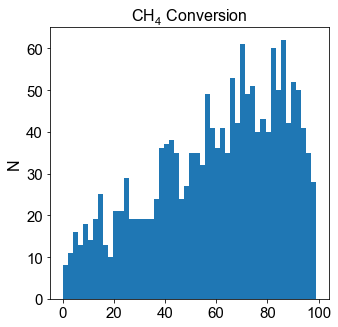

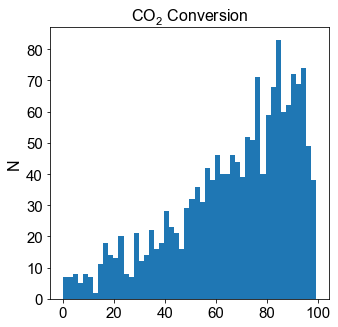

count    1564.000000
mean        0.825763
std         0.192451
min         0.000000
25%         0.744750
50%         0.860000
75%         0.940000
max         1.620000
Name: Syngas_Ratio, dtype: float64
count    1637.000000
mean       59.927015
std        25.481323
min         0.000000
25%        41.500000
50%        64.615000
75%        81.680000
max        99.100000
Name: CH4 Conversion, dtype: float64
count    1637.000000
mean       67.021266
std        23.557629
min         0.000000
25%        53.000000
50%        72.400000
75%        85.848000
max        99.200000
Name: CO2 Conversion, dtype: float64


In [4]:
def plttarget(targets, titles) -> None:
    ticksize = 15
    fsize = 16

    plt.figure(figsize=(5,5))
    plt.hist(targets[1], bins=50)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    plt.ylabel("N",fontsize=fsize)
    plt.title(titles[1],fontsize=fsize)
    plt.show()

    plt.figure(figsize=(5,5))
    plt.hist(targets[2], bins=50)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    plt.ylabel("N",fontsize=fsize)
    plt.title(titles[2],fontsize=fsize)
    plt.show()


def csv2df(location: str, obj="syngas", nodispersion=True):
    '''Converts .csv file in location to Pandas DataFrame
    returns df, unnormalized features X, and targets y'''
    try: 
        '''Try to read csv file, else raise that it may not be in the folder'''
        df = pd.read_csv(location, header = 0, index_col = False, encoding = 'utf-8')
        print(df)
    except:
        print(".csv file not found in folder, put file in same folder as this .ipynb notebook")
    
    try: # Reading data to see if they are formatted correctly
        if nodispersion: # if the Ni Dispersion column is excluded from dataset
            try:
                df = df.drop(columns=["Ni Dispersion"])
                df = df.dropna(subset=["CH4 Conversion", "CO2 Conversion"])
            except:
                print("Error occured during filtering")
        else: # drop NaN values, which can cause problems in other functions
            df = df.dropna(subset=["Syngas_Ratio", "Ni Particle Size", "Ni Dispersion"])
        try:
            # extract valid feature data from the columns [Ratio of CH4 to GHSV]
            features = df.loc[:,"Ratio of CH4 in Feed":"GHSV"] 
            features = features.dropna(axis=0)
        except:
            print("Error occurred when extracting features")
        if obj == "conv":
            # Assign the different targets
            target0 = df.loc[:,"Syngas_Ratio"]
            target1 = df.loc[:, "CH4 Conversion"]
            target2 = df.loc[:, "CO2 Conversion"]
            features = df.loc[:,"Ratio of CH4 in Feed":"GHSV"]

        plttarget([target0, target1, target2], ["Syngas Ratio","$CH_{4}$ Conversion", "$CO_{2}$ Conversion"])
    except: 
        print("csv file is read, but there is a formatting error")

    print(target0.describe())
    print(target1.describe())
    print(target2.describe())
    return df, features, target1, target2, pd.concat([target1, target2, target0], axis=1)

# NOTE: the csv just have to be in the same folder as this .ipynb file 
df, X, y1, y2, y = csv2df("Final Complied.csv",obj = 'conv',nodispersion=True)

To plot histogram of the feature variables

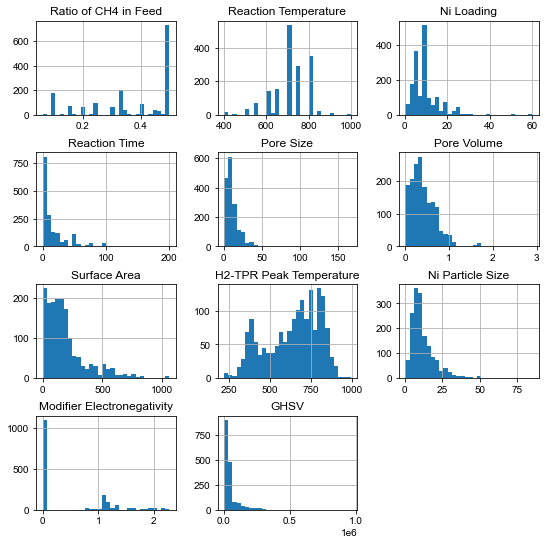

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1637.000000           1637.000000  1637.000000    1637.000000   
mean               0.371474            705.839951     9.420878      16.501770   
std                0.144335             86.389725     5.774367      23.018909   
min                0.060000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.900000       7.000000   
75%                0.500000            750.000000    10.570000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1637.000000  1637.000000   1637.000000              1637.000000   
mean     11.395297     0.405412    190.386302               640.938509   
std      10.501822     0.291483    174.773950   

In [5]:
def plthist(df: pd.DataFrame) -> None:
    '''Plot distribution plots for feature values to visualize their spread'''
    fig = df.hist(bins=30, figsize=(9, 9)) 
    fig = plt.gcf() 
    fig.subplots_adjust(wspace=0.3, hspace=0.4) # Adjust width and height between each subplot
    plt.show() # show subplot
    print(df.describe()) # describe the statistics of the features
plthist(X)

To plot 3D scatter plot of the three output targets

C:\Users\yifei\AppData\Local\Temp\ipykernel_14424\1799603592.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.5) # Add x, y gridlines to 3d plot


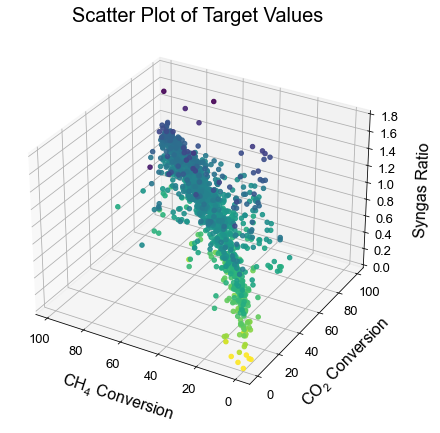

      CH4 Conversion  CO2 Conversion  Syngas_Ratio
0               68.5            73.6          0.70
1               66.9            72.4          0.70
2               18.4            26.1          1.00
3               14.6            19.9          0.90
4               61.3            74.0          0.70
...              ...             ...           ...
1709             9.0             5.0          0.01
1710            21.0            35.0          0.46
1711            34.0            49.0          0.65
1712            31.0            45.0          0.62
1713            39.0            52.0          0.61

[1637 rows x 3 columns]


In [6]:
def scatter3D(tar: pd.DataFrame) -> None:
        "To plot a 3D scatter plot of the target values"
        plt.rcParams["axes.labelpad"]=14
        xp = tar.iloc[:,0] # Ch4 conversion
        yp = tar.iloc[:,1] # co2 conversion
        zp = tar.iloc[:,2] # syngas ratio

        # Initalize 3D scatter plot
        fig, ax= plt.figure(figsize = (9, 7)), plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.5) # Add x, y gridlines to 3d plot
        
        my_cmap = plt.get_cmap("viridis_r") # Creating color map
        sctt = ax.scatter3D(xp, yp, zp,alpha = 0.9,c = (np.mean(xp/100 + yp/100) + zp),cmap = my_cmap,) # Creating 3D scatterplot

        # Set title, xlabels, ylabels and zlabels
        plt.title("Scatter Plot of Target Values", fontsize = 20)
        ax.tick_params(axis="both",labelsize=13)
        ax.set_xlabel('${CH_4}$ Conversion', fontsize = 16)
        ax.set_ylabel('${CO_2}$ Conversion',  fontsize = 16)
        ax.set_zlabel('Syngas Ratio   ',  fontsize = 16)
        ax.set_zlim([0,1.8])
        ax.invert_xaxis()
        plt.show()
        
scatter3D(y)
print(y)

Plot Correlation Matrix Heat Map

C:\Users\yifei\AppData\Local\Temp\ipykernel_14424\216662177.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) # Set a coolwarm colour map


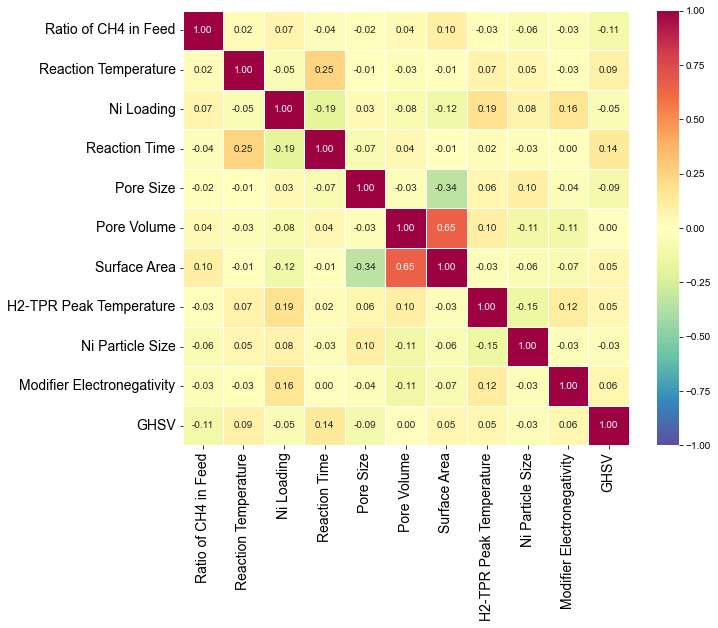

In [7]:
def pltcov(df: pd.DataFrame) -> None:
    '''Plots Correlation Matrix of the features within df'''
    annot_kws={'fontsize': 18,'fontweight': 'bold',} # annotation dictionary for style
    ticksize = 14
    # To plot correlation matrix for features only
    corr = df.iloc[:,1:-4].corr() # [1:-4] because the features are indexed from 1 to -5
    corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) # Set a coolwarm colour map
    plt.figure(figsize=(10,8))
    #plt.title("Heat map of correlation matrix for input features", fontsize=26)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    # Use seaborn heatmap function to plot the correlation matrix heat map
    sns.heatmap(corr, xticklabels=corr.columns.values, center=0,vmin=-1,yticklabels=corr.columns.values, linewidths=.5, cmap="Spectral_r",annot=True, fmt=".2f",)
    plt.show()
    
pltcov(df)